In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
gaze_df = pd.read_csv('gaze_log.csv')

In [24]:
def convert_to_list(s):
    return eval(s)
gaze_df['left_eye_from_center'] = gaze_df['left_eye_from_center'].apply(convert_to_list) 
gaze_df['right_eye_from_center'] = gaze_df['right_eye_from_center'].apply(convert_to_list) 
gaze_df['left_eye_dim'] = gaze_df['left_eye_dim'].apply(convert_to_list) 
gaze_df['right_eye_dim'] = gaze_df['right_eye_dim'].apply(convert_to_list)

print(gaze_df.dtypes)

left_eye_from_center      object
right_eye_from_center     object
time_start               float64
time_end                 float64
left_eye_dim              object
right_eye_dim             object
dtype: object


Eye position:
Where the pupil is relative to the whole eye |---o---| = 50%

In [25]:
def calculate_eye_position(row, eye='right'):
    eye_from_center = row[f'{eye}_eye_from_center'] 
    eye_dim = row[f'{eye}_eye_dim']

    x_position = (float(eye_dim[0]/2) +float(eye_from_center[0])) / float(eye_dim[0]) * 100
    y_position = (float(eye_dim[1]/2) +float(eye_from_center[1])) / float(eye_dim[1]) * 100
    return (x_position, y_position)

In [26]:
gaze_df['right_eye_pos'] = gaze_df.apply(calculate_eye_position, axis=1, eye='right')
gaze_df['left_eye_pos'] = gaze_df.apply(calculate_eye_position, axis=1, eye='left')

gaze_df = gaze_df.drop(['right_eye_from_center', 'left_eye_from_center', 'right_eye_dim', 'left_eye_dim'], axis=1)
#gaze_df.head

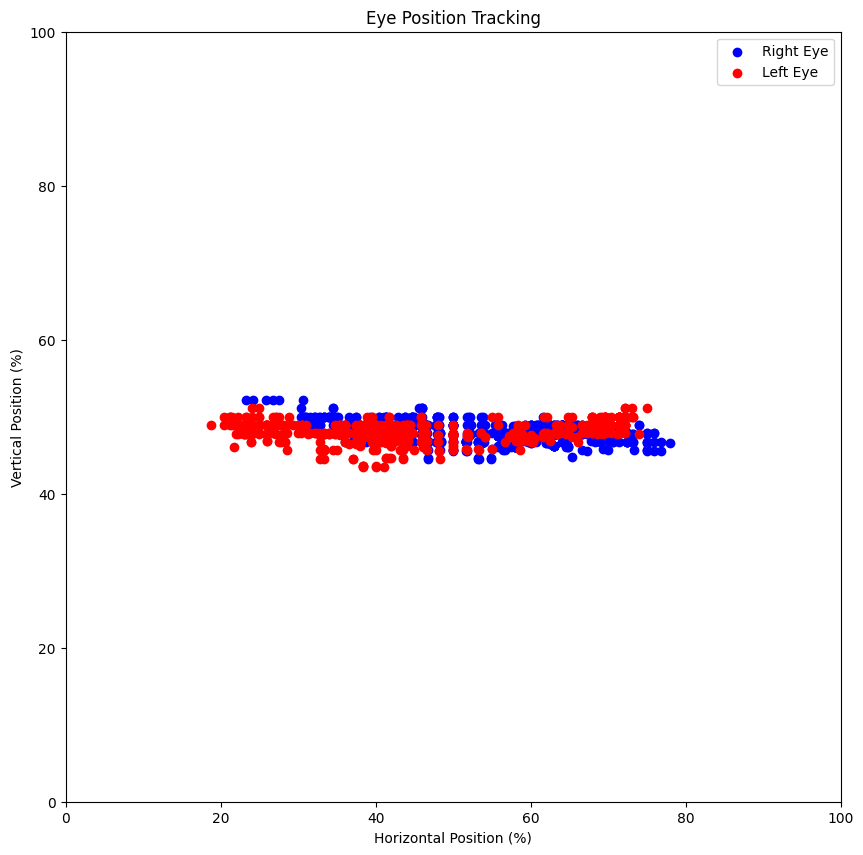

In [27]:
# Separate the x and y coordinates for both eyes
right_eye_x = [pos[0] for pos in gaze_df['right_eye_pos']]
right_eye_y = [pos[1] for pos in gaze_df['right_eye_pos']]
left_eye_x = [pos[0] for pos in gaze_df['left_eye_pos']]
left_eye_y = [pos[1] for pos in gaze_df['left_eye_pos']]

# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(right_eye_x, right_eye_y, color='blue', label='Right Eye')
plt.scatter(left_eye_x, left_eye_y, color='red', label='Left Eye')

# Set the axes limits
plt.xlim(0, 100)
plt.ylim(0, 100)

# Add labels and title
plt.xlabel('Horizontal Position (%)')
plt.ylabel('Vertical Position (%)')
plt.title('Eye Position Tracking')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Blink Rates and Blink Durations

In [28]:
blink_df = pd.read_csv('blink_log.csv')

<BarContainer object of 37 artists>

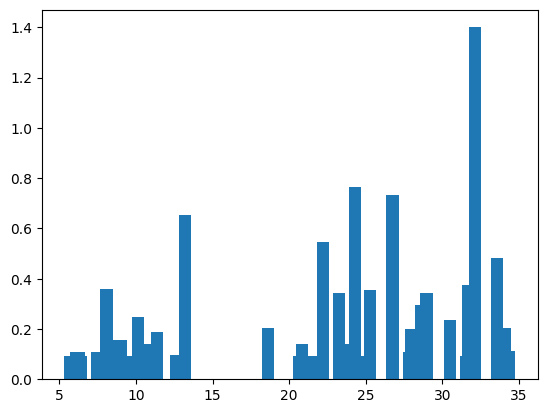

In [29]:
plt.bar(blink_df['start_time'], blink_df['duration'])

In [31]:
blink_df['interval'] = (blink_df['start_time'] // 5).astype(int)
blink_rate_per_interval = blink_df.groupby('interval').size().reset_index(name='blink_rate')

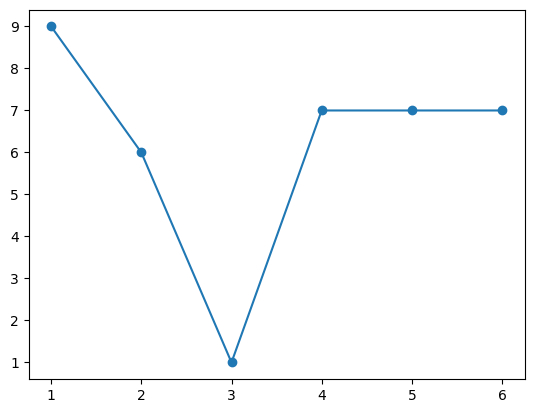

In [32]:
plt.plot(blink_rate_per_interval['interval'], blink_rate_per_interval['blink_rate'], marker='o', linestyle='-')